In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

C:\Users\Nisha\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def load_pickles(path):
    business = pd.read_pickle(path)
    return business

In [4]:
business_path = "C:/Users/Nisha/Downloads/CSE-544-Project-master/CSE-544-Project-master/business.pickle"
bcategories_path = "C:/Users/Nisha/Downloads/CSE-544-Project-master/CSE-544-Project-master/business_categories.pickle"
business_attributes_path = "C:/Users/Nisha/Downloads/CSE-544-Project-master/CSE-544-Project-master/business_attribute.pickle" 

business=load_pickles(business_path)
business_category = load_pickles(bcategories_path)
business_attributes= load_pickles(business_attributes_path)
photos = load_pickles("C:/Users/Nisha/photos.pickle")

In [8]:
photos = pd.DataFrame(data=photos)

In [36]:
business=pd.DataFrame(data=business)
business_category=pd.DataFrame(data=business_category)
business_attributes=pd.DataFrame(data=business_attributes)
#business_new = pd.merge(business,business_category,on='business_id')
#print(business_category)
#category_count = business_category.groupby('business_id').size()
X = pd.DataFrame()

#X['review_count'] = business['review_count']
#X['alcohol'] = business_attributes['Alcohol']
#X['HappyHour'] = business_attributes['HappyHour']
#X['WiFi']  = business_attributes['WiFi']
#X['OutdoorSeating'] = business_attributes['OutdoorSeating']
#print(X.shape)

In [23]:
print("Finding restaurants..")
restaurants_df = business_category[business_category['category_name'] == 'Restaurants']
restaurant_attributes = pd.merge(restaurants_df,business_attributes,on='business_id') #Restaurants with business id and attributes

restaurants = pd.merge(restaurants_df,business,on='business_id')
restaurant_review_count = pd.DataFrame()
restaurant_review_count['review_count'] = restaurants['review_count']
restaurant_review_count['business_id'] = restaurants['business_id'] #Restaurants with their business id and review count


Finding restaurants..


In [81]:
temp_attributes = pd.DataFrame()
temp_attributes['alcohol'] = restaurant_attributes['Alcohol']
temp_attributes['HappyHour'] = restaurant_attributes['HappyHour']
temp_attributes['WiFi']  = restaurant_attributes['WiFi']
temp_attributes['OutdoorSeating'] = restaurant_attributes['OutdoorSeating']
temp_attributes['business_id'] = restaurant_attributes['business_id']
print(len(temp_attributes))

54618


In [84]:
restaurants_photos = photos.groupby('business_id')['photo_id'].size().reset_index()
restaurants_photos.columns = ['business_id','num_of_photos']

x1 = pd.merge(restaurant_review_count,temp_attributes,on='business_id')
x2 = pd.merge(x1,restaurants_photos,on='business_id', how='left')
print(len(x2))

54618


In [85]:
x_temp = x2[['alcohol','HappyHour','WiFi','OutdoorSeating']]
x = pd.get_dummies(x_temp,drop_first=True)
print(len(x))

54618


In [76]:
#temp_business_attributes = business_attributes
#temp_business_attributes = temp_business_attributes.drop(columns=['business_id'])

#X = pd.DataFrame(X).as_matrix()
Y = pd.DataFrame(restaurants['stars'])

print(len(Y))

54618


In [182]:
"""
zeros = 0
ones = 0

for i in range(len(X)):
    for j in range(len(X[0])):
        if X[i][j] == False:
            zeros = zeros + 1
            X[i][j]=0
        else:
            ones = ones + 1
            X[i][j]=1
indices = ['AcceptsInsurance', 'AgesAllowed', 'Alcohol', 'BYOB', 'BYOBCorkage',
       'BikeParking', 'BusinessAcceptsBitcoin', 'BusinessAcceptsCreditCards',
       'ByAppointmentOnly', 'Caters', 'CoatCheck', 'Corkage', 'DogsAllowed',
       'DriveThru', 'GoodForDancing', 'GoodForKids', 'HappyHour', 'HasTV',
       'NoiseLevel', 'Open24Hours', 'OutdoorSeating', 'RestaurantsAttire',
       'RestaurantsCounterService', 'RestaurantsDelivery',
       'RestaurantsGoodForGroups', 'RestaurantsPriceRange2',
       'RestaurantsReservations', 'RestaurantsTableService',
       'RestaurantsTakeOut', 'Smoking', 'WheelchairAccessible', 'WiFi',
       'africanamerican', 'asian', 'background_music', 'breakfast', 'brunch',
       'casual', 'classy', 'coloring', 'curly', 'dairy-free',
       'dessert', 'dinner', 'divey', 'dj', 'extensions', 'friday', 'garage',
       'gluten-free', 'halal', 'hipster', 'intimate', 'jukebox', 'karaoke',
       'kids', 'kosher', 'latenight', 'live', 'lot', 'lunch', 'monday',
       'no_music', 'perms', 'romantic', 'saturday', 'soy-free',
       'straightperms', 'street', 'sunday', 'thursday', 'touristy', 'trendy',
       'tuesday', 'upscale', 'valet', 'validated', 'vegan', 'vegetarian',
       'video', 'wednesday']
#X = pd.DataFrame(X_temp)
#X.columns = indices
#X=X.loc[:,['Alcohol','HappyHour','WiFi','Smoking','OutdoorSeating','GoodForKids']]

"""


In [185]:
#X = X.reshape(-1, 1)
#print(X)
#X = pd.DataFrame(X)

#X['review_count'] = business['review_count']

In [139]:
lm.coef_

array([[-0.07562018,  0.10112202,  0.15949111,  0.03874552, -0.00654609,
         0.15575311,  0.11159047, -0.07134761]])

In [140]:
X_train, X_test, y_train, y_test = train_test_split(x,Y,test_size=0.10, random_state=15)


In [114]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [115]:
predictions

array([[3.57302515],
       [3.31241202],
       [3.53241248],
       ...,
       [3.46816513],
       [3.27553735],
       [3.31241202]])

In [116]:
def compute_sse_mape(Y_hat,Y_true):
    
    error = Y_true - Y_hat
    error_t = np.transpose(error)
    sse = np.dot(error_t,error)
    
    y_hat = np.array(Y_hat)
    y_true = np.array(Y_true)
    
    sum_errors = 0
    
    for y_hat_i,y_true_i in zip(y_hat,y_true):
        error = float(y_true_i-y_hat_i)
        error_norm = np.absolute(error/float(y_true_i))*100
        sum_errors += error_norm
            
    n = Y_true.shape[0]
    mape = (1/float(n))*sum_errors
    return mape,float(sse)


In [137]:
y_test = np.array(y_test)

mape,sse = compute_sse_mape(predictions,y_test)

mape

21.859896086509107

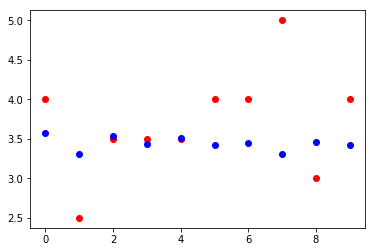

In [136]:
y_new  = []
y_hat = []

for sublist in y_test:
    for item in sublist:
        y_new.append(item)

for sublist in predictions:
    for item in sublist:
        y_hat.append(item)
        
plt.plot(y_new[0:10],'ro')
plt.plot(y_hat[0:10],'bo')
plt.show()
